# MANE 4962 HW5

Ruiyang Zhou

RIN: 662005044


## Problem 1

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

model = Sequential([
    Conv2D(64, (5, 5), input_shape=(32, 32, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 91s 114ms/step - loss: 1.6773 - accuracy: 0.3832 - val_loss: 1.4454 - val_accuracy: 0.4638
Epoch 2/10
782/782 [==============================] - 84s 108ms/step - loss: 1.3637 - accuracy: 0.5123 - val_loss: 1.2920 - val_accuracy: 0.5331
Epoch 3/10
782/782 [==============================] - 87s 111ms/step - loss: 1.2201 - accuracy: 0.5657 - val_loss: 1.2208 - val_accuracy: 0.5724
Epoch 4/10
782/782 [==============================] - 85s 109ms/step - loss: 1.1186 - accuracy: 0.6038 - val_loss: 1.1735 - val_accuracy: 0.5905
Epoch 5/10
782/782 [==============================] - 84s 108ms/step - loss: 1.0420 - accuracy: 0.6318 - val_loss: 1.0849 - val_accuracy: 0.6175
Epoch 6/10
782/782 [==============================] - 86s 109ms/step - loss: 0.9808 - accuracy: 0.6531 - val_loss: 1.0271 - val_accuracy: 0.6387
Epoch 7/10
782/782 [==============================] - 82s 105ms/step - loss: 0.9381 - accuracy: 0.6679 - val_loss: 0.9697 - val_ac

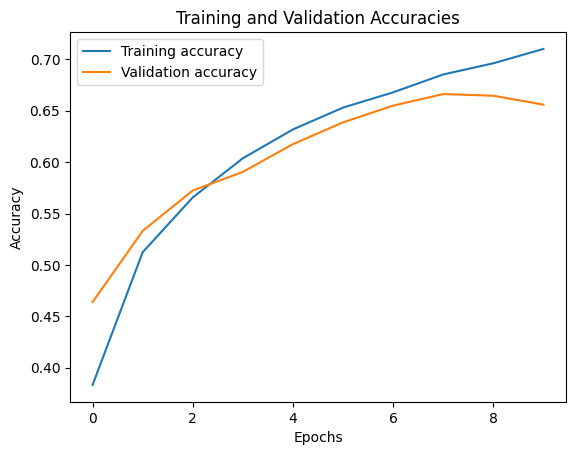

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Problem 2

### 2(a)

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Select features - indices may vary based on documentation
X = X[:, [23, 24, 28]]  # Assuming these are 'worst area', 'worst compactness', 'worst concavity'

# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM classifier with a linear kernel
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_linear = clf_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f'Accuracy of SVM with linear kernel: {accuracy_linear}')


Accuracy of SVM with linear kernel: 0.9707602339181286


### 2(b)

In [ ]:
# Create SVM classifier with RBF kernel
clf_rbf = svm.SVC(kernel='rbf', C=2)
clf_rbf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rbf = clf_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy of SVM with RBF kernel and C=2: {accuracy_rbf}')


Accuracy of SVM with RBF kernel and C=2: 0.9473684210526315
